## Optimize A Financial Investment Portfolio With Efficient Frontier Method

### Mohamed Moustafa

***

#### **Background:** 

This JupyterLab notebook is a very powerful tool that can both generate text for the reader to view as well as run the Python 3 code needed for this report. I will use the JupyterLab tool to create a full report on how to optimizie a financial portfolio.

First, it is important to understand that a portfolio is no more than just a collection of stock investments held by an investor. *Optimizing a financial portfolio requires selecting the best possible portfolio out of a set of all portfolios being considered according to an **objective**.* 

According to modern portfolio theory, one possible way to optimize a portfolio is to aim for an ***efficient frontier***. The efficient frontier is a investment portfolio that lies on the most efficient(ideal) coordinates of the risk-return graph(spectrum). There is a formal definition that is used by many experts in this field, "Efficient frontier is the set of portfolios which satisfy the condition that **no other portfolio exists with a higher expected return but with the same standard deviation of return**. 

Now we know the aim is to achieve one of the efficient frontier portfolios. However, we can even go one step further than the overall portfolio. We can identify the best possible proportion of the stocks to use in any given portfolio. This is possible by using the ***sharpe ratio***. 

The sharpe ratio was developed by William Sharpe in 1966. The sharpe ratio describes how much excess return of money one recieves for the extra volatile time he/she holds onto the investment. Basically, it measures how much extra capital money one can recieve by waiting and holding onto a risky stock investment. The sharpe ratio can be calculated by taking the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.

Usually experts define four categories for the result of the sharpe ratio:

|   Sharpe Ratio   |   Category   |
|:--------------------:|:----------------:|
|**ratio < 1.0**        |`sub-optimal`    |
|**ratio > 1.0** |`good`|
|**ratio > 2.0**|`very good`|
|**ratio > 3.0**|`excellent`|

After considering the efficient frontier theory, as well as the sharpe ratio, it is time to start the code to optimize a sample financial portfolio.

***

# Part 1: Initial Code

In [1]:
# The following program is meant to optimize a financial portfolio based off the efficient frontier theory, 
# and furthermore, the sharpe ratio for stocks proportions.
# Mohamed Moustafa, DTSC 615 Topics in Optimization

# Import the proper libraries needed

from pandas_datareader import data as web
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# Create the sample portfolio being used as an example
# Chosen stocks will be most popular and best performing 
# American technology companies, FAANG
# Facebook, Apple, Amazon, Netflix, and Google tickers will be used
# Each stock will have equal weight in the portfolio (20%)

portfolio = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights



array([0.2, 0.2, 0.2, 0.2, 0.2])

In [3]:
# Let us say that the portfolio starting date was around January 1st 2015
# The end date is today, currently.

portfolioStartDate = '2015-01-01'
today = datetime.today().strftime('%Y-%m-%d')

In [4]:
# Let us create a dataframe to store the adjusted close price of the stocks for each day,
# basically, how much the stock was worth in the portfolio after each closed day.

df = pd.DataFrame()

for stock in portfolio:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=portfolioStartDate , end=today)['Adj Close']

In [5]:
# Display the created dataframe

df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,99.945885,49.848572,523.373108
2015-01-05,77.190002,302.190002,97.130241,47.311428,512.463013
2015-01-06,76.150002,295.290009,97.139420,46.501427,500.585632
2015-01-07,76.150002,298.420013,98.501518,46.742859,499.727997
2015-01-08,78.180000,300.459991,102.286186,47.779999,501.303680
...,...,...,...,...,...
2020-05-18,213.190002,2426.260010,314.959991,452.579987,1383.939941
2020-05-19,216.880005,2449.330078,313.140015,451.040009,1373.484985
2020-05-20,229.970001,2497.939941,319.230011,447.670013,1406.719971


/Users/mohamedmoustafa/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


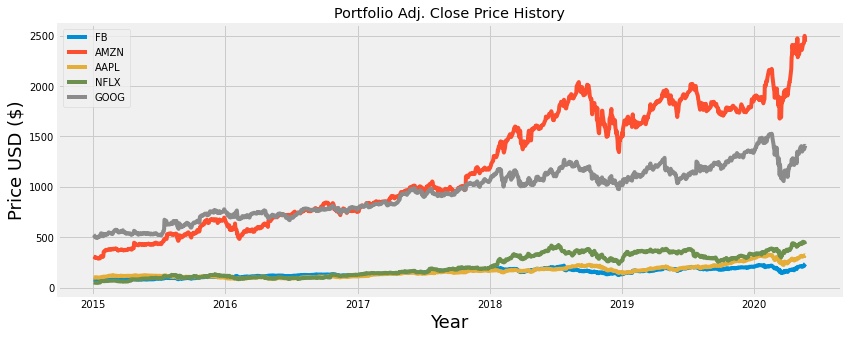

In [6]:
# Now let us display this dataframe visually so it will be easier to track stock progressions.

title = 'Portfolio Adj. Close Price History'
portfolio_stocks = df

plt.figure(figsize=(12.5,5.0)) #width = 12.5, height = 5.0

for p in portfolio_stocks.columns.values:
  plt.plot( portfolio_stocks[p],  label=p)

plt.title(title)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(portfolio_stocks.columns.values, loc='upper left')
plt.show()

In [7]:
# Now that we can visually see how our stock investments have been doing over the past 5 years,
# let us analyze the daily percent change of returns over that period.

returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
...,...,...,...,...,...
2020-05-18,0.010954,0.006839,0.023561,-0.003545,0.007828
2020-05-19,0.017309,0.009508,-0.005778,-0.003403,-0.007554
2020-05-20,0.060356,0.019846,0.019448,-0.007472,0.024198


Now let us create a **co-variance matrix**, which is used in order to compare data samples from different populations and is used to determine how much two random variables vary. In our case, it will measure how much one stock correlates with another in our portfolio. The diagonal values of this matrix are the variances, and the other entries are co-variances. If you take the square root of variance you get the volatility also known as the standard deviation.

We need the annualized co-variance matrix so multiply the co-variance matrix by the number of standard stock trading days in 1 year which is 252.

In [8]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.095922,0.055263,0.049593,0.056498,0.055593
AMZN,0.055263,0.093133,0.046082,0.066680,0.053276
AAPL,0.049593,0.046082,0.081237,0.049077,0.047630
NFLX,0.056498,0.066680,0.049077,0.180364,0.055383
GOOG,0.055593,0.053276,0.047630,0.055383,0.071770


In [9]:
# To see how much our portfolio correlates with itself, let us calculate the variance.

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print ('portfolio variance is: ' + str(port_variance))

# Calculate portfolio volatility (risk) - square root of variance

port_volatility = np.sqrt(port_variance)
print ('portfolio volatility is: ' + str(port_volatility))

# Annual Portfolio Return calculated

portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
print ('portfolio annual return is: ' + str(portfolioSimpleAnnualReturn))

portfolio variance is: 0.06370306545342781
portfolio volatility is: 0.252394662093769
portfolio annual return is: 0.32970441853361965


In [10]:
# Show the final returns and concluded results

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 33.0%
Annual volatility/standard deviation/risk : 25.0%
Annual variance : 6.0%


Now we can see the final results which indicate that with the sample portfolio used in this scenario, there is an expected annual return of 33%, and the risk factor is 25%. The percent that the stocks affect each other in my portfolio is the variance or 6%.

# Part 2: Optimizing Results and Code

I would like to optimize this portfolio, meaning I want to optimize for the maximum annual return with the least amount of volatility. In order to do this I have utilized a package created by Robert Martin, called pyportfoliopt

In [11]:
# Import necessary libraries from pyportfoliopt package

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [12]:
# Calculate the expected returns and the annual sample covariance matrix of daily stock returns.

mu = expected_returns.mean_historical_return(df) # returns.mean() * 252
S = risk_models.sample_cov(df) # Get the sample covariance matrix

In [13]:
# Now let us optimize for the maximal sharpe ratio which will tell us
# what porportion of our portfolio should each stock be to meet objective

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


{'FB': 0.0, 'AMZN': 0.69044, 'AAPL': 0.04352, 'NFLX': 0.26605, 'GOOG': 0.0}
Expected annual return: 43.9%
Annual volatility: 29.3%
Sharpe Ratio: 1.43


(0.4385741990313394, 0.2927777796177704, 1.4296651869475876)

# Optimized Result Analysis

By optimizing this portfolio with the sharpe ratio in mind, the adjusted stock porportions are given. According to the results the most optimal portfolio should have about 0.000% of the portfolio in Facebook, 69.044% in Amazon , 4.352% in Apple, 26.605% in Netflix and 0.000% in Google.

Also important to notice that the annual return raised from 33% pre-optimiation to 43.9% post optimization. The volatility increased as well to 29.3%. The sharpe ratio is 1.43 which referring to our table in the beginning means that our best ideal portfolio is only defined as good since it is less than 2.0 (very good). 

# Further Analysis

I want to know how many shares of each stock to buy, and how many funds I will have remaining based off of our optimized results. For this example, let us say I have $20,000 willing to invest.

In [15]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
print("Number of shares for each stock:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Number of stocks to buy for each asset: {'AMZN': 6.0, 'AAPL': 2.0, 'NFLX': 11.0}
Funds remaining: $18.42


Now we have to complete picture, and have arrived at the final optimized results in order to create our most ideal portfolio based off of 20,000 USD capital investment. Ideally we should buy 6 shares of Amazon, 2 shares of Apple, and 11 shares of Netflix. Following those guidlines, I will have around 18.42 USD left over.

# Conclusion

Thank you for viewing my report, I hope you have learned the best way to optimize a financial portfolio based off of initial capital and stock performances data using the efficient frontier theory and the sharpe ratio calculation.

Mohamed Moustafa